In [1]:
from sympy import symbols 
from sympy import solve
from sympy import *
import numpy as np
from scipy.optimize import minimize

In [2]:
R0,R1,x,y,k = symbols('R0,R1,x,y,k')

In [3]:
variable = np.random.uniform(0,1,1)[0]

In [4]:
variable

0.7945672765732427

In [5]:
class MonteCarlo:
    def __init__(self,R0,R1,alpha):
        self.R0=R0
        self.R1=R1
        self.aplha=alpha
        
    def make_trade(self):
        delta1 = np.random.uniform(0,1,1)[0]
        delta2 = np.random.uniform(0,1,1)[0]
        self.optimize_trade(delta1,delta2)
        
    def optimize_trade(self,delta1,delta2):

        z = Symbol('z', positive=True)
        r0 = self.R0
        r1 = self.R1
        g = - r0*r1/(r0+z)+r1
        o = (delta1-z)*(g+delta2)
        def fun(x):
            g = - r0*r1/(r0+x)+r1
            return -(delta1-x)*(g+delta2)
        # solution = solve(o.diff(z))
        bounds = [[0, delta1]]
        solution = minimize(fun, [0], method='SLSQP',bounds=[(0,1)])
        sol = solution.x[0]

        z = Symbol('z', positive=True)
        r0 = self.R0
        r1 = self.R1
        g = - r0*r1/(r1+z)+r0
        o = (delta1+g)*(delta2-z)
        def fun2(x):
            g = - r0*r1/(r1+x)+r0
            return -(delta2-x)*(g+delta1)
        #solution2 = solve(o.diff(z))
        bounds = [[0, delta2]]
        solution2 = minimize(fun2, [0], method='SLSQP',bounds=[(0,1)])
        sol2 = solution2.x[0]
        if fun(sol)>fun2(sol2):
            self.update_reserves(r0*r1/(r1+sol2)-r0,sol2)
        else:
            self.update_reserves(sol,r0*r1/(r0+sol)-r1)

    def update_reserves(self,a,b):
        self.R0 += a
        self.R1 += b

In [6]:
monte = MonteCarlo(900,1111.111111111111,1)

In [7]:
reserves =list()
for i in range(0,2*10**5):
    if i%1000==0:
        print(f'iteration {i}')
    reserves.append((monte.R0,monte.R1))
    monte.make_trade()

iteration 0
iteration 1000
iteration 2000
iteration 3000
iteration 4000
iteration 5000
iteration 6000
iteration 7000
iteration 8000
iteration 9000
iteration 10000
iteration 11000
iteration 12000
iteration 13000
iteration 14000
iteration 15000
iteration 16000
iteration 17000
iteration 18000
iteration 19000
iteration 20000
iteration 21000
iteration 22000
iteration 23000
iteration 24000
iteration 25000
iteration 26000
iteration 27000
iteration 28000
iteration 29000
iteration 30000
iteration 31000
iteration 32000
iteration 33000
iteration 34000
iteration 35000
iteration 36000
iteration 37000
iteration 38000
iteration 39000
iteration 40000
iteration 41000
iteration 42000
iteration 43000
iteration 44000
iteration 45000
iteration 46000
iteration 47000
iteration 48000
iteration 49000
iteration 50000
iteration 51000
iteration 52000
iteration 53000
iteration 54000
iteration 55000
iteration 56000
iteration 57000
iteration 58000
iteration 59000
iteration 60000
iteration 61000
iteration 62000
itera

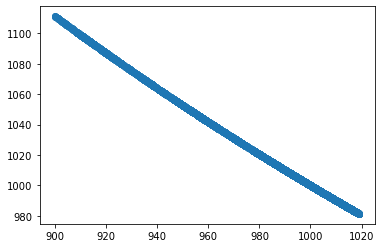

In [8]:
import numpy as np
import matplotlib.pyplot as plt
data = [[element[0] for element in reserves], [element[1] for element in reserves]]
plt.scatter(data[0], data[1])

In [9]:
sum([element[0]/element[1] for element in reserves])/2*10**5

9971241441.337753

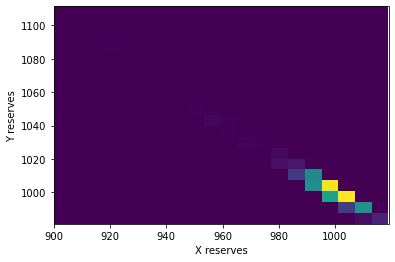

In [10]:
plt.hist2d(data[0], data[1], bins=20)
plt.xlabel("X reserves")
plt.ylabel("Y reserves")
plt.savefig('not_even_experiment.png')

In [11]:
prices = [element[0]/element[1] for element in reserves]

In [12]:
avg_prices = list()
price = 0
for i in range(1,len(prices)):
    price = ((i-1)*price+prices[i])/i
    avg_prices.append(price)

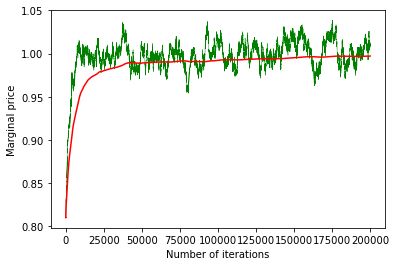

In [13]:
import matplotlib.pyplot as plt
plt.plot(prices,color='green',linewidth=0.4)
plt.plot(avg_prices,color='red')
plt.ylabel('Marginal price')
plt.xlabel('Number of iterations')
plt.savefig('not_even_experiment_prices.png')